In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train,x_test = x_train/255.0,x_test/255.0

In [4]:
model = Sequential([Flatten(input_shape=(28,28)),Dense(128,activation='relu'),Dense(64,activation='relu'),Dense(10,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6968 - loss: 1.0700 - val_accuracy: 0.9039 - val_loss: 0.3349
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9095 - loss: 0.3174 - val_accuracy: 0.9215 - val_loss: 0.2698
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9241 - loss: 0.2618 - val_accuracy: 0.9341 - val_loss: 0.2277
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.2278 - val_accuracy: 0.9418 - val_loss: 0.1983
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9428 - loss: 0.1964 - val_accuracy: 0.9479 - val_loss: 0.1793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9497 - loss: 0.1745 - val_accuracy: 0.9538 - val_loss: 0.1616
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9534 - loss: 0.1589 - val_accuracy: 0.9552 - val_loss: 0.1503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9599 - loss: 0.1421 -

In [9]:
test_loss , test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Loss :{test_loss}, Test Accuracy :{test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9562 - loss: 0.1435
Test Loss :0.12340553104877472, Test Accuracy :0.9639000296592712


In [14]:
predictions = model.predict(x_test, batch_size=128)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions.argmax(axis=1)))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.97      0.96      0.96       892
           6       0.96      0.96      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



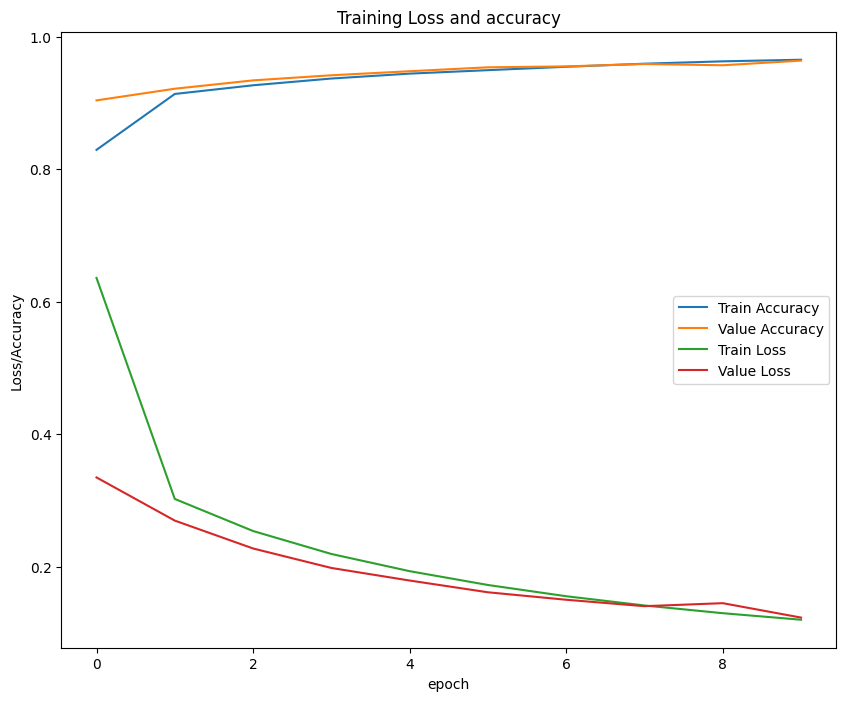

In [22]:
plt.figure(figsize=(10,8))
plt.title('Training Loss and accuracy')
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Value Accuracy')
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Value Loss')
plt.xlabel('epoch')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='center right')

plt.show()